In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_sales = pd.read_csv("umsatzdaten_gekuerzt.csv")
df_sales.head()


,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754


In [3]:
df_sales["Datum"] = pd.to_datetime(df_sales["Datum"])


In [4]:
df_sales["weekday"] = df_sales["Datum"].dt.day_name()
df_sales.head()


,id,Datum,Warengruppe,Umsatz,weekday
0,1307011,2013-07-01,1,148.828353,Monday
1,1307021,2013-07-02,1,159.793757,Tuesday
2,1307031,2013-07-03,1,111.885594,Wednesday
3,1307041,2013-07-04,1,168.864941,Thursday
4,1307051,2013-07-05,1,171.280754,Friday


In [5]:
weekday_mean = df_sales.groupby("weekday")["Umsatz"].mean()
weekday_mean


weekday
Friday       196.796023
Monday       193.688449
Saturday     241.319882
Sunday       246.495651
Thursday     193.232274
Tuesday      187.944440
Wednesday    187.477523
Name: Umsatz, dtype: float64

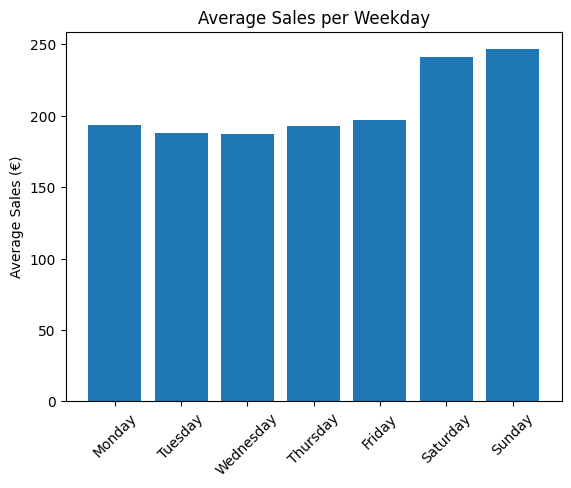

In [6]:
import matplotlib.pyplot as plt

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_mean = weekday_mean.reindex(order)

plt.bar(weekday_mean.index, weekday_mean.values)
plt.xticks(rotation=45)
plt.ylabel("Average Sales (€)")
plt.title("Average Sales per Weekday")
plt.show()


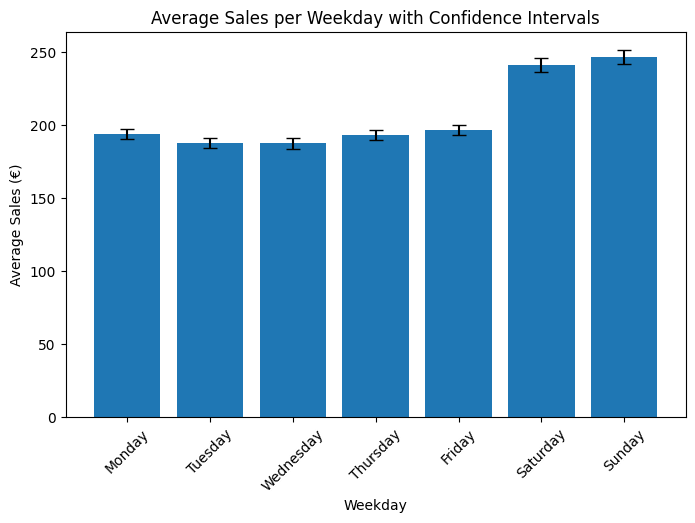

In [7]:
import numpy as np

stats = df_sales.groupby("weekday")["Umsatz"].agg(['mean', 'std', 'count'])

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
stats = stats.reindex(order)

#   Standard Error
stats["se"] = stats["std"] / np.sqrt(stats["count"])

plt.figure(figsize=(8,5))
plt.bar(stats.index, stats["mean"], yerr=stats["se"], capsize=5)
plt.xlabel("Weekday")
plt.ylabel("Average Sales (€)")
plt.title("Average Sales per Weekday with Confidence Intervals")
plt.xticks(rotation=45)
plt.show()
